In [3]:
## 1. Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

In [4]:
#*# 2. Importar dataset
#! com pasta 'database/file.csv'
file ='Dataset/forestfires.csv'
df = pd.read_csv(file)
dataset = df

In [5]:
## 3. Analise exploratória de dados
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
#*# 3.1. Agrupando atributos (facilita a vida)
atributos_X          = [] # Preenchido no passo 5.5
atributos_preditivos = [] # Usado no passo 4

#Definindo os atributos
atributo_alvo        = ''
atributos_numericos  = [] 
atributos_binarios   = []
atributos_nominais   = []
atributos_enum       = []

atributos_desnecessarios = ['']

#Removendo o atributo alvo das variáveis de pesquisa
atributos_numericos  = [ x for x in atributos_numericos if x is not atributo_alvo ]
atributos_binarios   = [ x for x in atributos_binarios if x is not atributo_alvo ]
atributos_nominais   = [ x for x in atributos_nominais if x is not atributo_alvo ]
atributos_enum       = [ x for x in atributos_enum if x is not atributo_alvo ]
# Reunindo atributos
atributos            = atributos_numericos
atributos            = np.append(atributos, atributos_binarios)
atributos            = np.append(atributos, atributos_nominais)
atributos            = np.append(atributos, atributos_enum)

In [5]:
## 4. Resolvendo valores ausentes
atrb_na = ['']
###! Remove linha nula
df = df.dropna(subset=atrb_na)
###! Remove coluna nula
#df = df.drop(atrib_na, axis=1)
###! Procura o valor para preencher linhas com valor nulo
#! strategy : string, default='mean'
#!    - If "mean", then replace missing values using the mean along
#!      each column. Can only be used with numeric data.
#!
#!    - If "median", then replace missing values using the median along
#!      each column. Can only be used with numeric data.
#!	Use when the values are smoothly distributed
#!
#!    - If "most_frequent", then replace missing using the most frequent
#!      value along each column. Can be used with strings or numeric data.
#!
#!    - If "constant", then replace missing values with fill_value. Can be
#!      used with strings or numeric data.
#estrategia	  = 'mean'
#imputer = SimpleImputer(strategy=estrategia)
#novos_valores = imputer.fit_transform(df_treino[atrb_na])


In [6]:
## 4.1. Calculando as correlações entre os atributos
# Prepara os atributos não String
atributos_preditivos = atributos_numericos
atributos_preditivos = np.append(atributos_preditivos, atributos_enum)

print (
    'Quantidade de atributos preditivos: ',
        atributos_preditivos.size,
    '.\nLista dos atributos preditivos:',
        atributos_preditivos)

# Correlação de Pearson
corr = np.corrcoef(df[atributos_preditivos],rowvar=False)

# Tabularização das informações
dfcorr = pd.DataFrame(corr,index=atributos_preditivos,columns=atributos_preditivos)

# Exporta para csv
dfcorr.to_csv('correlmat.csv',sep=';',decimal=',')

Quantidade de atributos preditivos:  7 .
Lista dos atributos preditivos: ['displacement' 'horsepower' 'weight' 'acceleration' 'cylinders'
 'model year' 'origin']


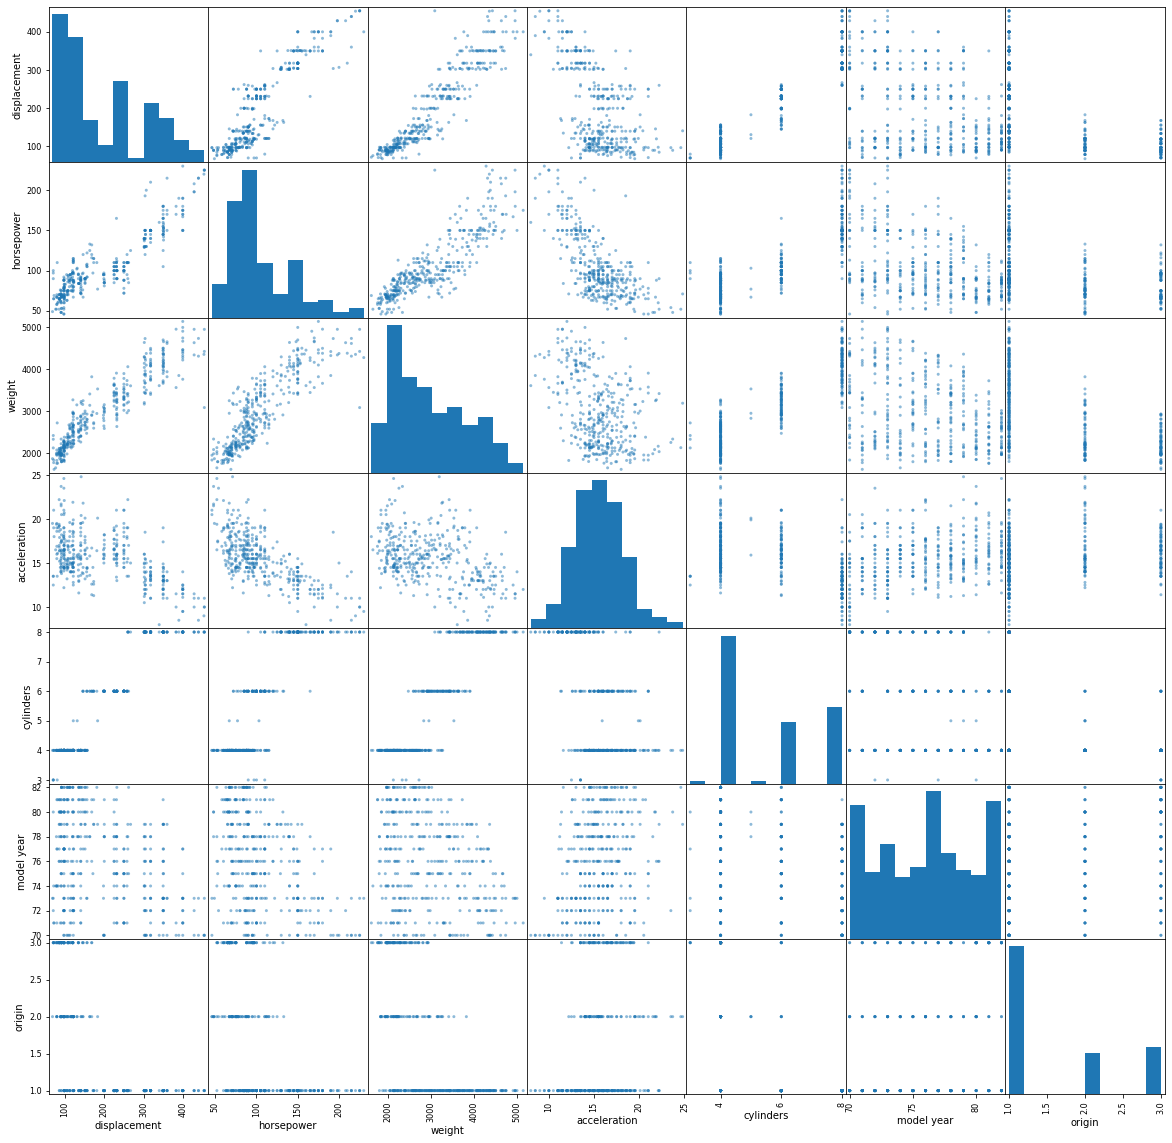

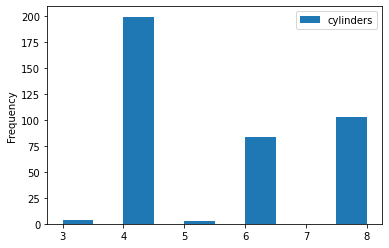

In [7]:
## +STEP Comparando correlação (revalidando Peason)
pd.plotting.scatter_matrix(df[atributos],figsize=(20, 20))
plt.show()

df.plot(x='', y='', kind='hist')
plt.show()

In [8]:
#*# 4.2. Listando atributos desnecessários
#! Atributo com valor muito próximos de 1 do passo acima.
#! + Atributos irrelevantes para o aprendizado

# Variável correlacionado com cylinders (Peason 0,95)
# atributos_desnecessarios = ['']

# Removendo a variável desnecessária dos atributos
for atrb_name in atributos_desnecessarios:
    atributos_numericos  = [ x for x in atributos_numericos if x is not atrb_name ]
    atributos_binarios   = [ x for x in atributos_binarios if x is not atrb_name ]
    atributos_nominais   = [ x for x in atributos_nominais if x is not atrb_name ]
    atributos_enum       = [ x for x in atributos_enum if x is not atrb_name ]
    
atributos = atributos_numericos
atributos = np.append(atributos, atributos_binarios)
atributos = np.append(atributos, atributos_nominais)
atributos = np.append(atributos, atributos_enum)

In [9]:
## 5. Pré-processamento
df_treino, df_teste = train_test_split(df, test_size=0.2, random_state=42)

In [10]:
## 5.1. Separando o atributo alvo dos preditivos
df_treino_labels = df_treino[atributo_alvo].copy()
df_treino        = df_treino.drop(columns=atributo_alvo)

In [11]:
## 5.2. (+> 4.1) Removendo atributos desnecessários
df_treino = df_treino.drop (columns=atributos_desnecessarios)
df_teste  = df_teste.drop  (columns=atributos_desnecessarios)

In [12]:
## 5.3. Ajustando a escala dos atributos numéricos quantitativos
scaler = StandardScaler()
scaler.fit(df_treino[atributos_numericos])

StandardScaler()

In [13]:
#!# 5.4. Populando o X_treino com colunas numericas
X = scaler.transform(df_treino[atributos_numericos])
atributos_X = atributos_numericos

In [14]:
#!# 5.5. Populando o X_treino com colunas binárias
X = np.concatenate((X, df_treino[atributos_binarios]),axis=1)
atributos_X = np.append(atributos_X, atributos_binarios)

In [15]:
#!# 5.6. Binarizando atributos categóricos
for atrb_name in atributos_enum:
    # binarizando a coluna de nome atrb_name
    lb = LabelBinarizer()
    dados = lb.fit_transform(df_treino[atrb_name].values)
    
    # acrescentando a matriz com as novas colunas na matriz X
    X = np.concatenate((X, dados),axis=1)
    
    # criando nomes para as novas colunas no seguinte formato: nome_do_atributo=valor_do_atributo
    nomes_novos_atributos = []
    for class_name in lb.classes_:
        nomes_novos_atributos = np.append(nomes_novos_atributos,atrb_name+'='+str(class_name))
        
    # acrescentando os nomes das novas colunas na lista completa do dataset
    atributos_X = np.append(atributos_X, nomes_novos_atributos)

In [16]:
X[0:2]

array([[ 0.14142863,  0.75480297,  1.1217589 ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ],
       [-0.32949862, -0.49312922, -0.22893966,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ]])

In [17]:
## 6. Visualização do resultado do pré-processamento
df_treino_preproc = pd.DataFrame(X, columns=atributos_X)
df_treino_preproc.head()

,horsepower,weight,acceleration,cylinders=3,cylinders=4,cylinders=5,cylinders=6,cylinders=8,model year=70,model year=71,...,model year=76,model year=77,model year=78,model year=79,model year=80,model year=81,model year=82,origin=1,origin=2,origin=3
0,0.141429,0.754803,1.121759,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.329499,-0.493129,-0.228940,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.198685,-0.002530,-0.371118,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.187934,1.368052,-0.726565,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.062052,-1.323099,0.304231,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
